In [1]:
import pandas as pd
from pathlib import Path

data_path = Path.cwd() / "data/games.csv"

df = pd.read_csv(data_path)

In [2]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [3]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

excluded_cols = [
  "GAME_DATE_EST",
  "GAME_ID",
  "GAME_STATUS_TEXT",
  "HOME_TEAM_ID",
  "VISITOR_TEAM_ID",
  "SEASON",
  "TEAM_ID_home",
  "PTS_home",
  "TEAM_ID_away",
  "PTS_away",
  "HOME_TEAM_WINS"
]

features = [col for col in df.columns if col not in excluded_cols]

X = df[features]
y = df["HOME_TEAM_WINS"]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.84


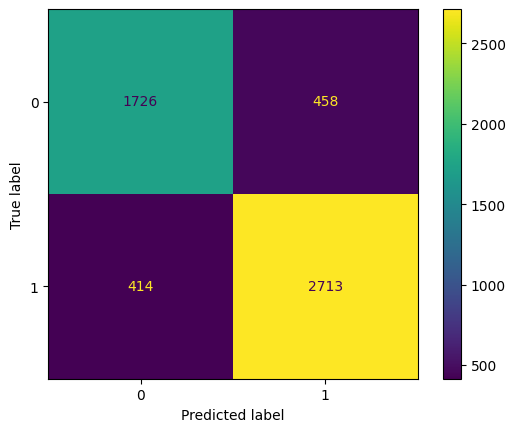

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [7]:
features

['FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away']

In [ ]:
#Test for a new prediction
#Data taken from 10/28/25 games, LAC vs GSW
new_game = pd.DataFrame([
  {
    "FG_PCT_home": 36.6,
    "FT_PCT_home": 81.3,
    "FG3_PCT_home": 18.2,
    "AST_home": 10,
    "REB_home": 47,
    "FG_PCT_away": 45.3,
    "FT_PCT_away": 75.0,
    "FG3_PCT_away": 37.8,
    "AST_away": 24,
    "REB_away": 42
  }
])

#Predicted correctly that LAC would lose
prediction = model.predict(new_game)
print("Predicted win" if prediction[0] == 1 else "Predicted loss")

Predicted loss


In [9]:
#Persisting model with pickle
from pickle import dump


with open("model.pkl", "wb") as f:
  dump(model, f, protocol=5)
